In [1]:
!pip install tflite-model-maker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 38.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tflite-model-maker to determine which version is compatible with other requirements. This could take a while.
Requested tflite-model-maker from https://files.pythonhosted.org/packages/29/dc/f74a8aa41a8b78dc57e6cf1acf0003b40753c8b73ce581532ceff1442aaf/tflite_model_maker-0.3.2-py3-none-any.whl has invalid metadata: Expected matching RIGHT_PARENTHESIS for LEFT_PARENTHESIS, after version specifier
    tensorflow-hub (<0.10>=0.8.0)
                   ~~~~~~^
Please use pip<24.1 if you need to use this version.
Requested tflite-model-maker from https://files.pythonhosted.org/packages/ea/96/b3149af45895426a918591d57a237323dbc2d331a

In [2]:
!pip install kaggle

In [3]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:24<00:00, 145MB/s]
100% 1.98G/1.98G [00:24<00:00, 87.7MB/s]


In [10]:
!unzip fruit-and-vegetable-image-recognition.zip -d ./dataset

Archive:  fruit-and-vegetable-image-recognition.zip
  inflating: ./dataset/test/apple/Image_1.jpg  
  inflating: ./dataset/test/apple/Image_10.jpg  
  inflating: ./dataset/test/apple/Image_2.jpg  
  inflating: ./dataset/test/apple/Image_3.jpg  
  inflating: ./dataset/test/apple/Image_4.jpg  
  inflating: ./dataset/test/apple/Image_5.jpg  
  inflating: ./dataset/test/apple/Image_6.JPG  
  inflating: ./dataset/test/apple/Image_7.jpg  
  inflating: ./dataset/test/apple/Image_8.jpg  
  inflating: ./dataset/test/apple/Image_9.jpg  
  inflating: ./dataset/test/banana/Image_1.jpg  
  inflating: ./dataset/test/banana/Image_10.jpg  
  inflating: ./dataset/test/banana/Image_2.jpg  
  inflating: ./dataset/test/banana/Image_3.jpg  
  inflating: ./dataset/test/banana/Image_4.jpg  
  inflating: ./dataset/test/banana/Image_5.jpg  
  inflating: ./dataset/test/banana/Image_6.jpg  
  inflating: ./dataset/test/banana/Image_8.jpg  
  inflating: ./dataset/test/banana/Image_9.jpg  
  inflating: ./dataset/te

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from google.colab import files

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


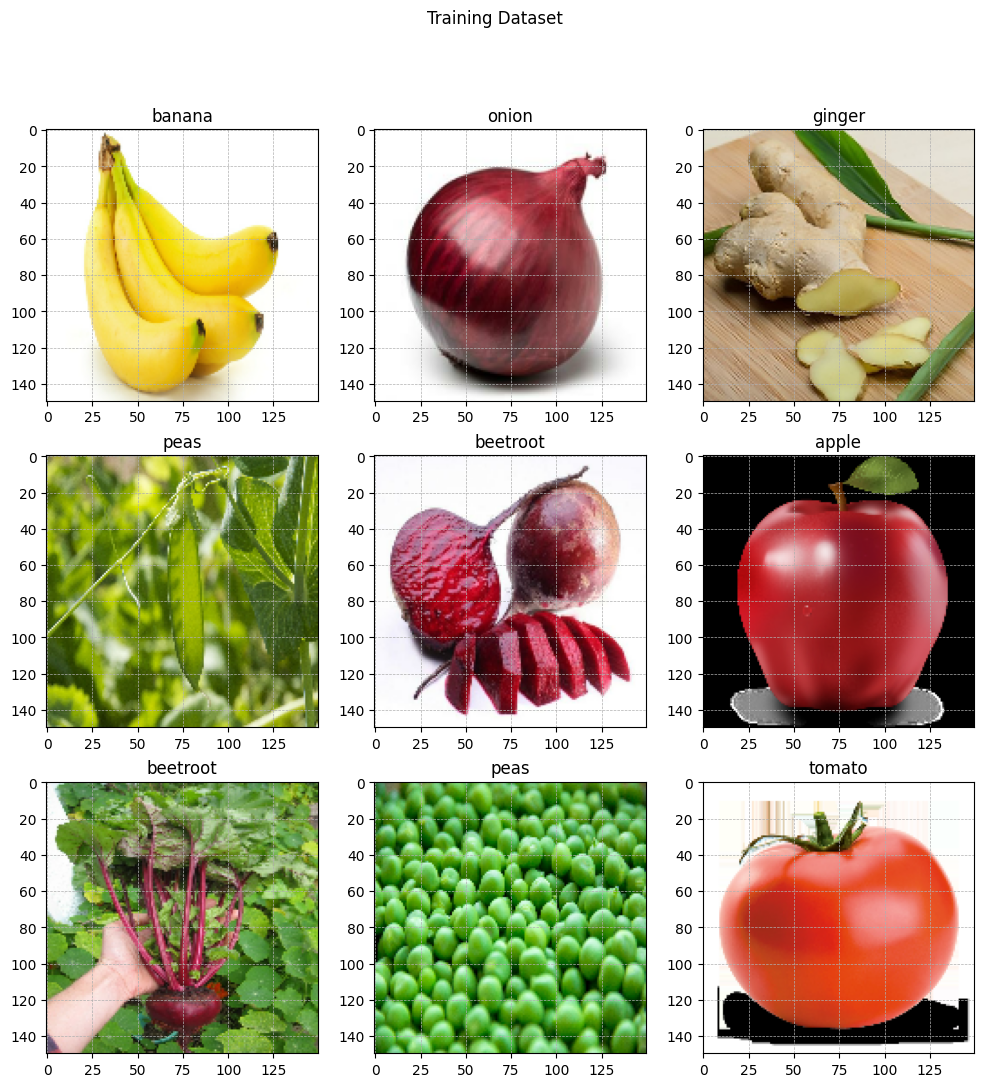

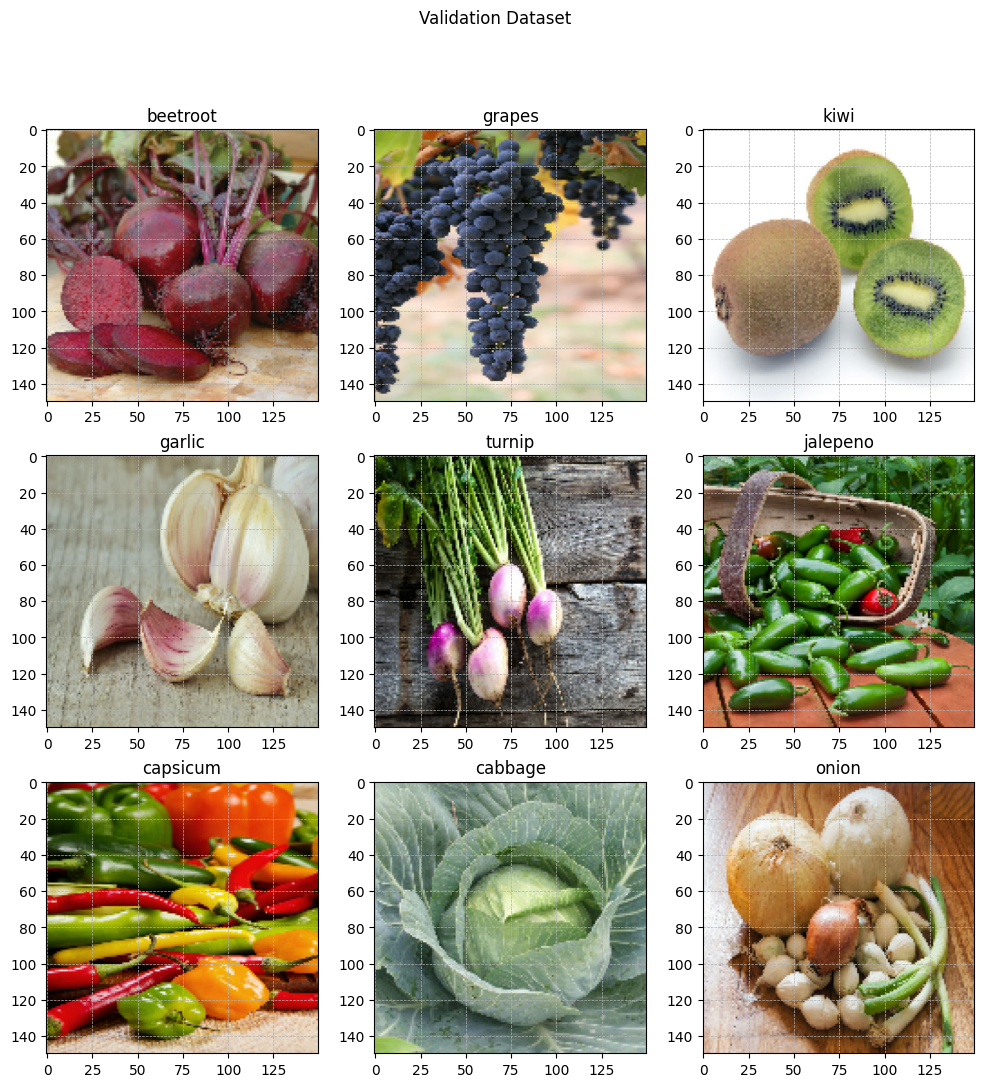

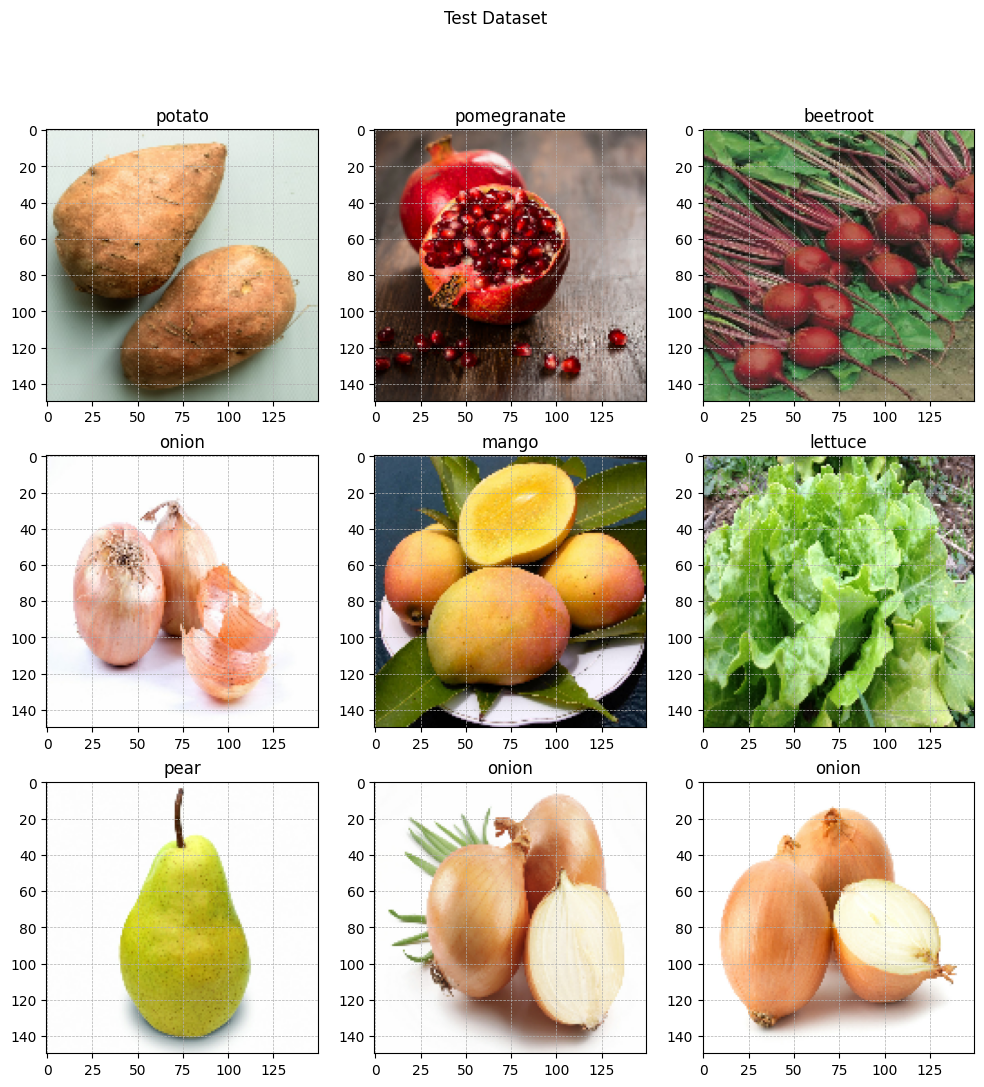

In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Tambahkan jika menggunakan notebook
%matplotlib inline

# Plotting function to display images with labels
def plot_images_with_labels(dataset, title):
    plt.figure(figsize=(12, 12))
    for images, labels in dataset.take(1):
        # Pastikan class_names tersedia, jika tidak ada, inisialisasi manual
        class_names = dataset.class_names if hasattr(dataset, 'class_names') else ['Class 0', 'Class 1', 'Class 2']
        for i in range(min(9, len(images))):  # Display 9 images or less
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            label = class_names[int(labels[i].numpy())]
            plt.title(label)
            plt.axis("on")
            plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.suptitle(title)
    plt.show()

# Parameters
img_height, img_width = 150, 150
batch_size = 32

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/train",  # Pastikan path ini sesuai
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/validation",  # Pastikan path ini sesuai
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/test",  # Pastikan path ini sesuai
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Plot sample images with labels
plot_images_with_labels(train_ds, "Training Dataset")
plot_images_with_labels(val_ds, "Validation Dataset")
plot_images_with_labels(test_ds, "Test Dataset")

In [15]:
# Define the Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_ds.class_names), activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,832,996 (18.44 MB)

 Trainable params: 4,832,996 (18.44 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
early_stopping = EarlyStopping(monitor='accuracy', patience=3, mode='max', restore_best_weights=True, verbose=1, min_delta=0.001, baseline=0.96)

In [18]:
# Train the model with the callback
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=35,
    callbacks=[early_stopping]
)

Epoch 1/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 70s 644ms/step - accuracy: 0.0677 - loss: 3.4269 - val_accuracy: 0.3134 - val_loss: 2.4184
Epoch 2/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 62s 628ms/step - accuracy: 0.2662 - loss: 2.4803 - val_accuracy: 0.5271 - val_loss: 1.6509
Epoch 3/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 627ms/step - accuracy: 0.3837 - loss: 2.0479 - val_accuracy: 0.7379 - val_loss: 1.1230
Epoch 4/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 610ms/step - accuracy: 0.4973 - loss: 1.6798 - val_accuracy: 0.7977 - val_loss: 0.8331
Epoch 5/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 627ms/step - accuracy: 0.6014 - loss: 1.3136 - val_accuracy: 0.8604 - val_loss: 0.5496
Epoch 6/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 625ms/step - accuracy: 0.7435 - loss: 0.8602 - val_accuracy: 0.9259 - val_loss: 0.3830
Epoch 7/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 625ms/step - accuracy: 0.8358 - loss: 0.5566 - val_accuracy: 0.9259 - val_loss: 0.3465
Epoch 8/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 79s 591ms/step - accuracy: 0.8847 - loss: 0.3877 - val_accu

In [19]:
# Mengambil nilai akhir dari akurasi dan loss
final_training_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
final_training_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

# Menampilkan hasil akhirnya saja
print("Final Training Accuracy:", final_training_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)
print("Final Training Loss:", final_training_loss)
print("Final Validation Loss:", final_val_loss)

Final Training Accuracy: 0.9829855561256409
Final Validation Accuracy: 0.9601139426231384
Final Training Loss: 0.07810753583908081
Final Validation Loss: 0.3544822633266449


In [20]:
# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmphxqbaboj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 36), dtype=tf.float32, name=None)
Captures:
  134169686091280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134169686092688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134169686091984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134170014460112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134170014457296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134170014459056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134170014465392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134170014460464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134170014459232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134170014464864: TensorSpec(shape=(), dtype=tf.resource, name=None)


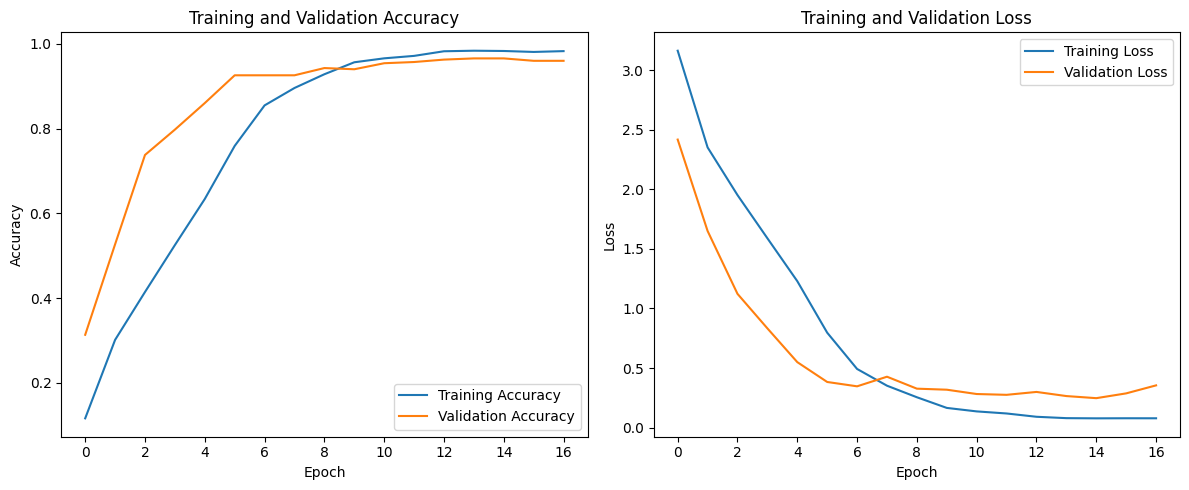

In [27]:
# Retrieve training history
history_dict = history.history

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


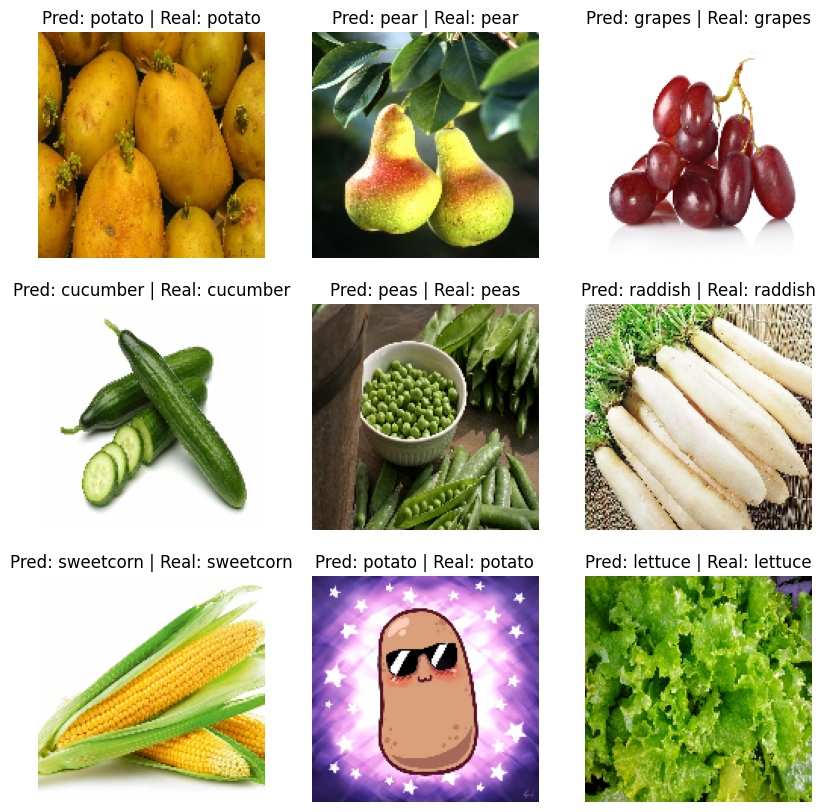

In [28]:
# Plot predictions on test data
class_names = train_ds.class_names

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
    classifications = model.predict(images)

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index = np.argmax(classifications[i])
        plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i].numpy()])
        plt.axis("off")
plt.show()

Saving images (1).jpeg to images (1) (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


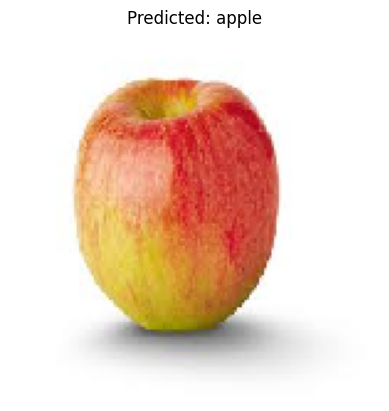

Filename: images (1) (1).jpeg
Predicted Class: apple
------------------------------


In [29]:
# Upload gambar
uploaded = files.upload()
labels = [
    'apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum',
    'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant',
    'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce',
    'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple',
    'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn',
    'sweetpotato', 'tomato', 'turnip', 'watermelon'
]

# Use the labels in your prediction loop
for fn in uploaded.keys():
    path = fn
    # Load and preprocess the image
    img = image.load_img(path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    images = np.vstack([img_array])

    # Make predictions
    predictions = model.predict(images, batch_size=10)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Display the image with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted: {labels[predicted_class]}")
    plt.axis('off')
    plt.show()

    # Print the results
    print(f"Filename: {fn}")
    print(f"Predicted Class: {labels[predicted_class]}")
    print("-" * 30)

Saving images (2).jpeg to images (2) (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


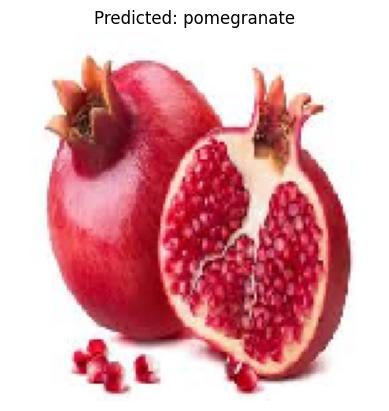

Filename: images (2) (1).jpeg
Predicted Class: pomegranate
------------------------------


In [30]:
uploaded = files.upload()
labels = [
    'apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum',
    'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant',
    'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce',
    'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple',
    'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn',
    'sweetpotato', 'tomato', 'turnip', 'watermelon'
]

# Use the labels in your prediction loop
for fn in uploaded.keys():
    path = fn
    # Load and preprocess the image
    img = image.load_img(path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    images = np.vstack([img_array])

    # Make predictions
    predictions = model.predict(images, batch_size=10)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Display the image with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted: {labels[predicted_class]}")
    plt.axis('off')
    plt.show()

    # Print the results
    print(f"Filename: {fn}")
    print(f"Predicted Class: {labels[predicted_class]}")
    print("-" * 30)